# AMATH 515 Homework 1

**Due Date: 01/27/2021**

*Homework Instruction*: Please fill in the gaps in this template where commented as `TODO`. When submitting, make sure your file is still named `515Hw1_Coding.ipynb` -- that's what Gradescope will be looking for. There is no need to submit `hw1_supp.py`, it will already be on the server when you submit your work. You'll have **10 attempts** to pass the tests. 

In [145]:
# require numpy module
import numpy as np
from numpy.linalg import norm
from numpy.linalg import solve
import matplotlib.pyplot as plt

In [146]:
# import supplementary functions for Homework 1
import sys
sys.path.insert(0, './')
from hw1_supp import *

In [147]:
# You can change this seed if you want to test that your program works with different random data,
# but please set it back to 123 when you submit your work.
seed = 123

## Gradient Descent Solver

Recall the gradient descent algorithm we learned in class and complete the gradient descent solver.

In [148]:
def optimizeWithGD(x0, func, grad, step_size, tol=1e-6, max_iter=1000, use_line_search=False):
    """
    Optimize with Gradient Descent
    
    input
    -----
    x0 : array_like
        Starting point for the solver.
    func : function
        Takes x and return the obj function value.
    grad : function
        Takes x and returns the gradient of "func".
    step_size : float or None
        If it is a float number and `use_line_search=False`, it will be used as the step size.
        Otherwise, line search will be used
    tol : float, optional
        Gradient tolerance for terminating the solver.
    max_iter : int, optional
        Maximum number of iterations for terminating the solver.
    use_line_search : bool, optional
        When it is true a line search will be used, other wise `step_size` has to be provided.
        
    output
    ------
    x : array_like
        Final solution
    obj_his : array_like
        Objective function's values convergence history
    err_his : array_like
        Norm of gradient convergence history
    exit_flag : int
        0, norm of gradient below `tol`
        1, exceed maximum number of iteration
        2, line search fail
        3, other
    """
    # safeguard
    if not use_line_search and step_size is None:
        print('Please specify the step_size or use the line search.')
        return x0, np.array([]), np.array([]), 3
    
    # initial step
    x = np.copy(x0)
    g = grad(x)
    #
    obj = func(x)
    err = norm(g)
    #
    obj_his = np.zeros(max_iter + 1)
    err_his = np.zeros(max_iter + 1)
    #
    obj_his[0] = obj
    err_his[0] = err
    
    # start iterations
    iter_count = 0
    while err >= tol:
        if use_line_search:
            step_size = lineSearch(x, g, g, func)
        #
        # if line search fail step_size will be None
        if step_size is None:
            print('Gradient descent line search fail.')
            return x, obj_his[:iter_count+1], err_his[:iter_count+1], 2
        #
        # gradient descent step
        #####
        # TODO: with given step_size, complete gradient descent step
        # x = ? 
        #####
        x -= step_size * g
        # update obj function and gradient and error
        g = grad(x)
        #
        obj = func(x)
        err = norm(g)
        #
        iter_count += 1
        obj_his[iter_count] = obj
        err_his[iter_count] = err
        #
        # check if exceed maximum number of iteration
        if iter_count >= max_iter:
            print('Gradient descent reached maximum number of iteration.')
            return x, obj_his[:iter_count+1], err_his[:iter_count+1], 1
    #
    return x, obj_his[:iter_count+1], err_his[:iter_count+1], 0

## Newton's Solver

Recall Newton method we learned from in class and complete Newton solver.

In [149]:
def optimizeWithNT(x0, func, grad, hess, tol=1e-6, max_iter=100):
    """
    Optimize with Newton's Method
    
    input
    -----
    x0 : array_like
        Starting point for the solver.
    func : function
        Takes x and return the function value.
    grad : function
        Takes x and return the gradient.
    hess : function
        Input x and return the Hessian matrix.
    tol : float, optional
        Gradient tolerance for terminating the solver.
    max_iter : int, optional
        Maximum number of iteration for terminating the solver.
        
    output
    ------
    x : array_like
        Final solution
    obj_his : array_like
        Objective function value convergence history
    err_his : array_like
        Norm of gradient convergence history
    exit_flag : int
        0, norm of gradient below `tol`
        1, exceed maximum number of iteration
        2, others
    """
    # initial step
    x = np.copy(x0)
    g = grad(x)
    H = hess(x)
    #
    obj = func(x)
    err = norm(g)
    #
    obj_his = np.zeros(max_iter + 1)
    err_his = np.zeros(max_iter + 1)
    #
    obj_his[0] = obj
    err_his[0] = err
    
    # start iterations
    iter_count = 0
    while err >= tol:
        # Newton step
        #####
        # TODO: complete Newton step
        # x = ? hint: using solve function
        #####
        x -= solve(H,g)
        # update function, gradient, error and Hessian
        g = grad(x)
        H = hess(x)
        #
        obj = func(x)
        err = norm(g)
        #
        iter_count += 1
        obj_his[iter_count] = obj
        err_his[iter_count] = err
        #
        # check if we exceeded maximum number of iterations
        if iter_count >= max_iter:
            print('Gradient descent reached maximum number of iteration.')
            return x, obj_his[:iter_count+1], err_his[:iter_count+1], 1
    #
    return x, obj_his[:iter_count+1], err_his[:iter_count+1], 0

## Simple Test

Consider a simple test problem,

$$
\min_x~~f(x) \triangleq \frac{1}{2} \|x - b\|^2
$$

We can easily calculate the gradient and Hessian of $f$,

$$
\nabla f(x) = x - b, \quad \nabla^2 f(x) = I
$$

where $I$ is an identity matrix, and we know that $x^* = b$ is the solution.

We will use this function as a simple test to check whether gradient descent and Newton method are implemented right.

In [150]:
# create b
b = np.array([1.0, 2.0, 3.0])
# define test function
def test_func(x):
    return 0.5*sum((x - b)**2)
# define test gradient
def test_grad(x):
    return x - b
# define test Hessian
def test_hess(x):
    return np.eye(b.size)

In [151]:
# test gradient descent
x0_gd = np.zeros(b.size)
#
x_gd, obj_his_gd, err_his_gd, exit_flag_gd = optimizeWithGD(x0_gd, test_func, test_grad, 1.0)
# check if the solution is correct
err_gd = norm(x_gd - b)
#
if err_gd < 1e-6:
    print('Gradient Descent: OK')
else:
    print('Gradient Descent: Err')

Gradient Descent: OK


In [152]:
# test Newton's method
x0_nt = np.zeros(b.size)
#
x_nt, obj_his_nt, err_his_nt, exit_flag_nt = optimizeWithNT(x0_nt, test_func, test_grad, test_hess)
# check if the solution is correct
err_nt = norm(x_nt - b)
#
if err_nt < 1e-6:
    print('Newton: OK')
else:
    print('Newton: Err')

Newton: OK


## Logistic Regression

Recall the logistic regression model
$$
f(x) = \sum_{i=1}^m\left\{\log\left[1+\exp(\langle a_i,x\rangle)\right]-b_i\langle a_i,x\rangle\right\} + \frac{\lambda}{2}\|x\|^2.
$$

Calculate the gradient and Hessian of this function and define them below using the given data.

In [153]:
# fix a random seed
np.random.seed(seed)
# set dimensions and create some random data
m_lgt = 500
n_lgt = 50
A_lgt = 0.3*np.random.randn(m_lgt, n_lgt)
x_lgt = np.random.randn(n_lgt)
b_lgt = sampleLGT(x_lgt, A_lgt)
lam_lgt = 0.1

### Define functions

In [154]:
# implement logistic function, gradient and Hessian
def lgt_func(x):
    #####
    # TODO: complete the function
    #####
    log_f = np.sum(np.log(1 + np.exp(A_lgt@x))) - b_lgt.T@A_lgt@x + (lam_lgt/2)*norm(x@x)
    return log_f
#
def lgt_grad(x):
    #####
    # TODO: complete the gradient
    #####
    log_g = A_lgt.T @ ((np.exp(A_lgt@x)/(1 + np.exp(A_lgt@x))) - b_lgt) + lam_lgt*x
    return log_g
#
def lgt_hess(x):
    #####
    # TODO: complete the Hessian
    #####
    log_h = A_lgt.T @ np.diag(np.exp(A_lgt@x)/((np.exp(A_lgt@x)+1)**2)) @ A_lgt + np.diag(lam_lgt*np.ones(n_lgt))
    return log_h

In [155]:
#==GRADED==#
# No need to change anything in this cell.
x_test = 3*np.ones(n_lgt)
# We test the values of these functions at a sample point (3, 3, ..., 3)
lgt_func_test = lgt_func(x_test)
lgt_grad_test = lgt_grad(x_test)
lgt_hess_test = lgt_hess(x_test)

In [166]:
# uniform step size for gradient descent or should we use line search?
#####
# TODO: if there is a uniform stepsize, set up step_size_lgt = 
# otherwise set use_line_search=True
#####
def solve_B(matrix,regs = None):
    if regs is None:
        vals,vecs = np.linalg.eig(matrix.T@matrix)
        eigval = np.max(np.abs(vals))
        return 2*eigval
    
    ### another way###
    if regs is not None:
        eigval = (2*np.linalg.norm(matrix,2)**2 + regs)
        return eigval
step_size_lgt = 1/solve_B(A_lgt,lam_lgt)


### Apply gradient descent solver

In [167]:
x0_lgt_gd = np.zeros(n_lgt)
#==GRADED==#
# No need to change anything in this cell.
x_lgt_gd, obj_his_lgt_gd, err_his_lgt_gd, exit_flag_lgt_gd = \
    optimizeWithGD(x0_lgt_gd, lgt_func, lgt_grad, step_size_lgt)

Gradient descent reached maximum number of iteration.


Text(0.5, 0.98, 'Gradient Descent on Logistic Regression')

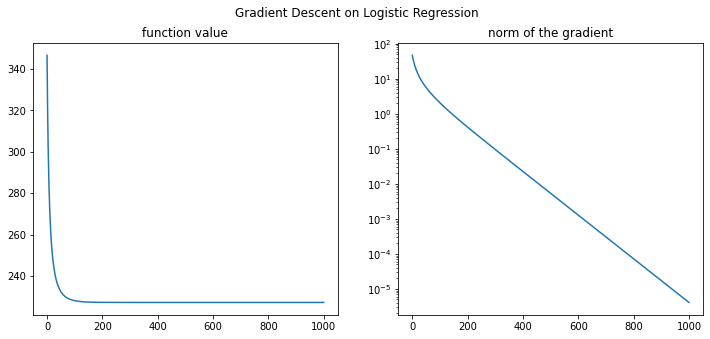

In [168]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_lgt_gd)
ax[0].set_title('function value')
ax[1].semilogy(err_his_lgt_gd)
ax[1].set_title('norm of the gradient')
fig.suptitle('Gradient Descent on Logistic Regression')

### Apply Newton's solver

In [169]:
x0_lgt_nt = np.zeros(n_lgt)
#==GRADED==#
# No need to change anything in this cell.
x_lgt_nt, obj_his_lgt_nt, err_his_lgt_nt, exit_flag_lgt_nt = \
    optimizeWithNT(x0_lgt_nt, lgt_func, lgt_grad, lgt_hess)

Text(0.5, 0.98, "Newton's Method on Logistic Regression")

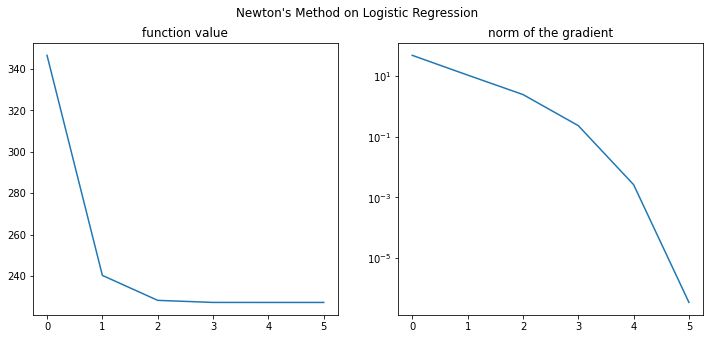

In [170]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_lgt_nt)
ax[0].set_title('function value')
ax[1].semilogy(err_his_lgt_nt)
ax[1].set_title('norm of the gradient')
fig.suptitle('Newton\'s Method on Logistic Regression')

## Poisson Regression

Recall the Poisson regression model
$$
f(x)=\sum_{i=1}^m\left[\exp(\langle a_i,x\rangle)-b_i\langle a_i,x\rangle\right]+\frac{\lambda}{2}\|x\|^2
$$

Calculate the gradient and Hessian of this function and define them below using the given data.

In [171]:
# fix a random seed
np.random.seed(seed)
# set the dimensions and create some data
m_psn = 500
n_psn = 50
A_psn = 0.3*np.random.randn(m_psn, n_psn)
x_psn = np.random.randn(n_psn)
b_psn = samplePSN(x_psn, A_psn)
lam_psn = 0.1

### Define functions

In [172]:
# define function, gradient and Hessian
def psn_func(x):
    #####
    # TODO: complete the function
    #####
    psn_f = np.sum(np.exp(A_psn@x)) - b_psn.T@A_psn@x + (lam_psn/2)*norm(x@x)
    return psn_f
#
def psn_grad(x):
    #####
    # TODO: complete the gradient
    #####
    psn_g = A_psn.T @ (np.exp(A_psn@x) - b_psn) + lam_psn*x
    return psn_g
#
def psn_hess(x):
    #####
    # TODO: complete the Hessian
    #####
    psn_h = A_psn.T @ np.diag(np.exp(A_psn@x)) @ A_psn + np.diag(lam_psn*np.ones(n_psn))
    return psn_h

In [173]:
#==GRADED==#
# No need to change anything in this cell.
x_test = 2*np.ones(n_psn)
psn_func_test = psn_func(x_test)
psn_grad_test = psn_grad(x_test)
psn_hess_test = psn_hess(x_test)

In [140]:
# uniform step size for gradient descent or should we use line search?
#####
# TODO: if there is a uniform stepsize, set up step_size_lgt = 
# otherwise set use_line_search=True
#####

### Apply gradient descent solver

In [174]:
x0_psn_gd = np.zeros(n_lgt)
#==GRADED==#
# No need to change anything in this cell.
x_psn_gd, obj_his_psn_gd, err_his_psn_gd, exit_flag_psn_gd = \
    optimizeWithGD(x0_psn_gd, psn_func, psn_grad, None, use_line_search=True)

Text(0.5, 0.98, 'Gradient Descent on Poisson Regression')

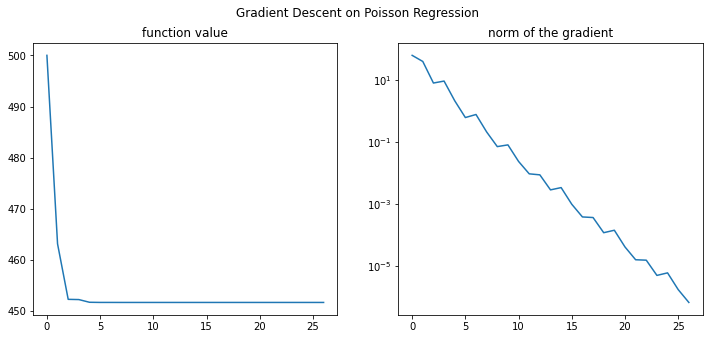

In [175]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_psn_gd)
ax[0].set_title('function value')
ax[1].semilogy(err_his_psn_gd)
ax[1].set_title('norm of the gradient')
fig.suptitle('Gradient Descent on Poisson Regression')

### Apply Newton's solver

In [176]:
x0_psn_nt = np.zeros(n_lgt)
#==GRADED==#
# No need to change anything in this cell.
x_psn_nt, obj_his_psn_nt, err_his_psn_nt, exit_flag_psn_nt = \
    optimizeWithNT(x0_psn_nt, psn_func, psn_grad, psn_hess)

Text(0.5, 0.98, "Newton's Method on Poisson Regression")

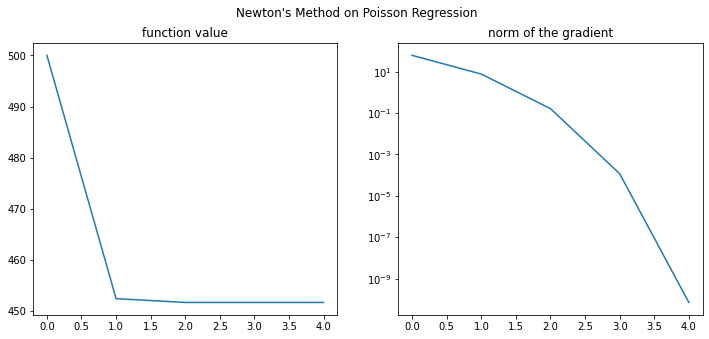

In [177]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_psn_nt)
ax[0].set_title('function value')
ax[1].semilogy(err_his_psn_nt)
ax[1].set_title('norm of the gradient')
fig.suptitle('Newton\'s Method on Poisson Regression')